In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import folium

In [56]:
ispu = pd.read_excel('DATABMKG.xlsx',sheet_name="Sheet1")

In [57]:
duplicatesNum = ispu.duplicated().sum()
print(f"Ada duplikat sebanyak {duplicatesNum}")


Ada duplikat sebanyak 0


In [58]:
ispu.head()

,Tanggal,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,2010-01-01,25,31.4,27.1,85,0,7.3,6,45,2,NE
1,2010-01-02,25,30.8,26.9,86,8888,5.4,5,45,2,NE
2,2010-01-03,24,31.2,27.4,86,8888,4,7,45,3,E
3,2010-01-04,24,27.8,25.9,85,8888,0,4,270,2,W
4,2010-01-05,25,31,27,84,8888,4.4,6,90,3,NE


In [59]:
# Nilai yang dianggap sebagai missing 
nilai_missing = ['8888', '9999', '-', '0']

ispu_str = ispu.astype(str)
missing_tersembunyi = ispu_str.isin(nilai_missing).sum()
missing_nan = ispu.isna().sum()

total_missing = missing_nan + missing_tersembunyi

persentase_missing = total_missing / len(ispu) * 100
print(persentase_missing)


Tanggal     0.000000
TN          6.521739
TX          6.960175
TAVG        2.246986
RH_AVG      1.242236
RR         59.389843
SS         10.906102
FF_X        1.169163
DDD_X       1.297041
FF_AVG      2.721958
DDD_CAR     1.187431
dtype: float64


In [60]:
# Forward fill (isi dengan nilai sebelumnya)
ispu = ispu.ffill()
# Backward fill (isi dengan nilai setelahnya jika masih ada NaN)
ispu = ispu.bfill()

In [61]:
ispu.isna().sum()/len(ispu)*100

Tanggal    0.0
TN         0.0
TX         0.0
TAVG       0.0
RH_AVG     0.0
RR         0.0
SS         0.0
FF_X       0.0
DDD_X      0.0
FF_AVG     0.0
DDD_CAR    0.0
dtype: float64

In [62]:
ispu.replace(['-', 8888, 9999], np.nan, inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12092\2973385920.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ispu.replace(['-', 8888, 9999], np.nan, inplace=True)


In [63]:
ispu = ispu.ffill()
ispu = ispu.bfill()

In [64]:
ispu.head()

,Tanggal,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,2010-01-01,25.0,31.4,27.1,85.0,0.0,7.3,6.0,45.0,2,NE
1,2010-01-02,25.0,30.8,26.9,86.0,0.0,5.4,5.0,45.0,2,NE
2,2010-01-03,24.0,31.2,27.4,86.0,0.0,4.0,7.0,45.0,3,E
3,2010-01-04,24.0,27.8,25.9,85.0,0.0,0.0,4.0,270.0,2,W
4,2010-01-05,25.0,31.0,27.0,84.0,0.0,4.4,6.0,90.0,3,NE


In [65]:
ispu['Tahun'] = pd.DatetimeIndex(ispu['Tanggal']).year
ispu['Bulan'] = pd.DatetimeIndex(ispu['Tanggal']).month
ispu['Hari'] = ispu['Tanggal'].dt.day_name()

In [66]:
ispu.head()

,Tanggal,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR,Tahun,Bulan,Hari
0,2010-01-01,25.0,31.4,27.1,85.0,0.0,7.3,6.0,45.0,2,NE,2010,1,Friday
1,2010-01-02,25.0,30.8,26.9,86.0,0.0,5.4,5.0,45.0,2,NE,2010,1,Saturday
2,2010-01-03,24.0,31.2,27.4,86.0,0.0,4.0,7.0,45.0,3,E,2010,1,Sunday
3,2010-01-04,24.0,27.8,25.9,85.0,0.0,0.0,4.0,270.0,2,W,2010,1,Monday
4,2010-01-05,25.0,31.0,27.0,84.0,0.0,4.4,6.0,90.0,3,NE,2010,1,Tuesday


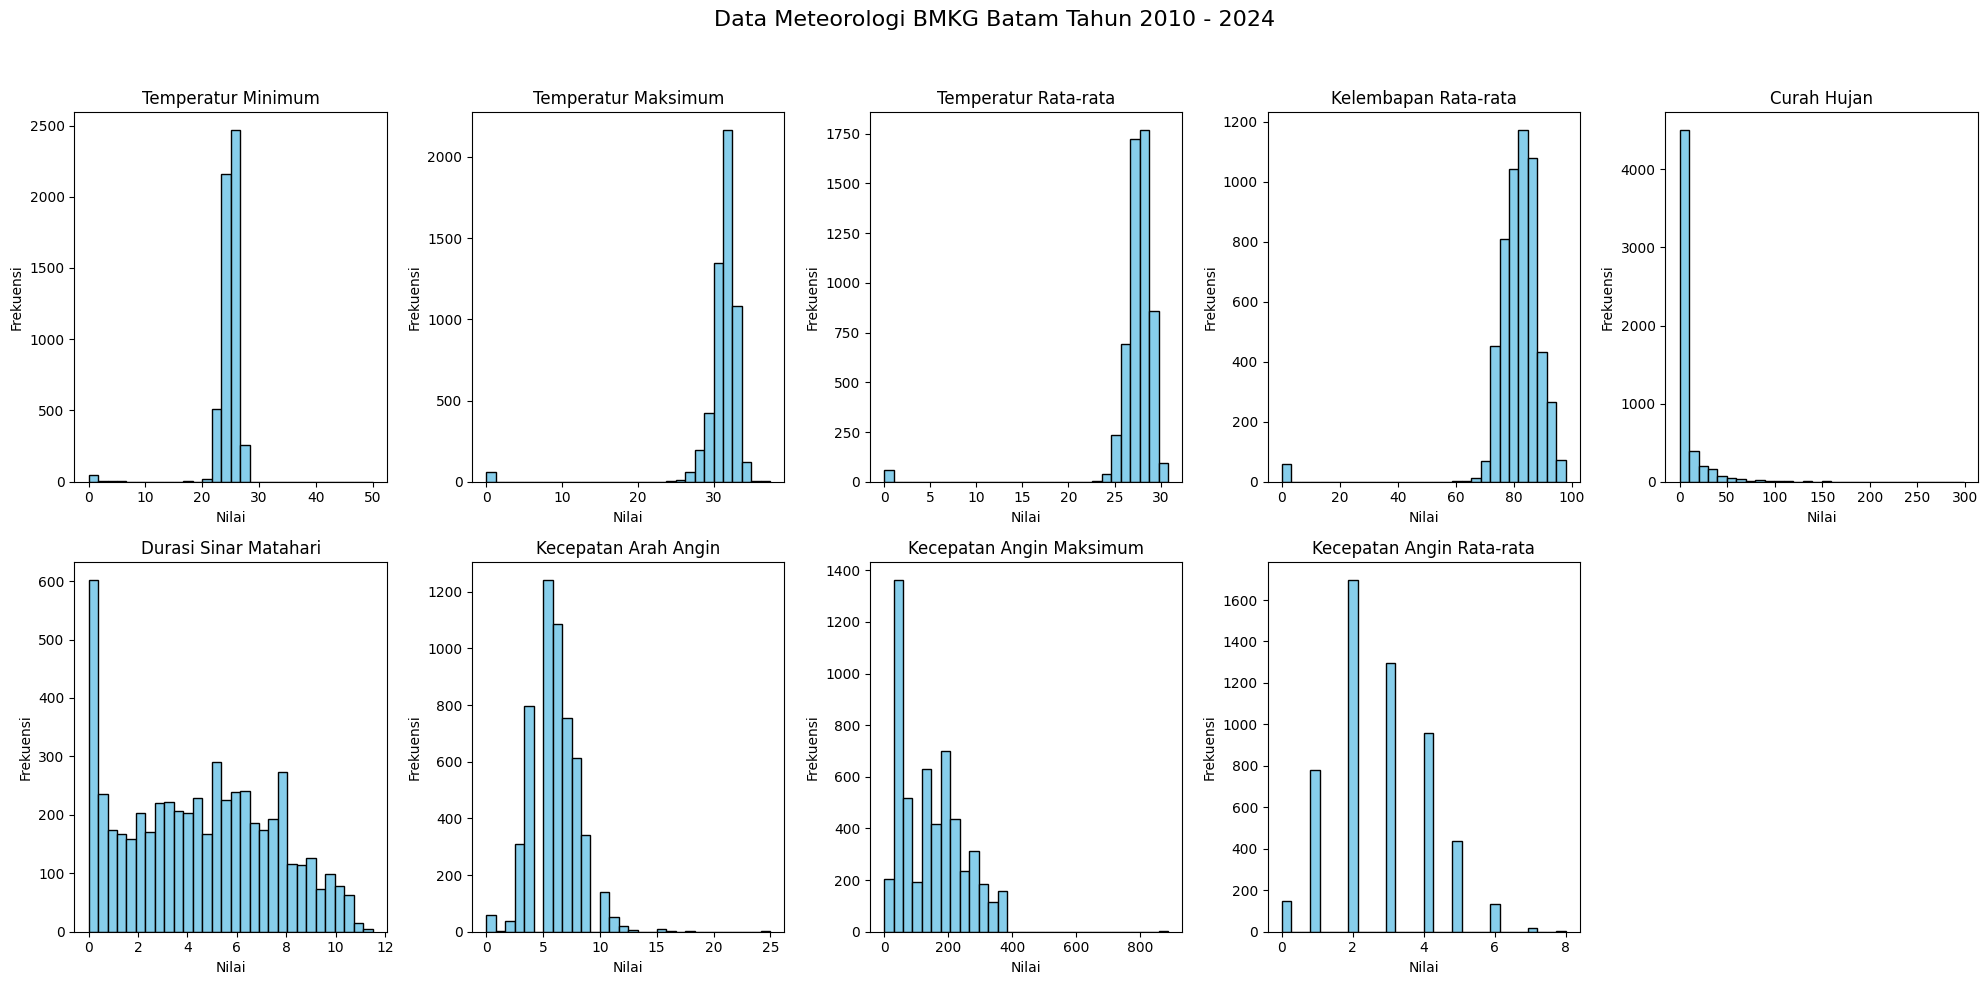

In [67]:

plt.figure(figsize=(20, 10))

# Histogram 1: Temperatur Minimum
plt.subplot(2, 5, 1)
plt.hist(ispu['TN'], bins=30, color='skyblue', edgecolor='black')
plt.title('Temperatur Minimum')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

# Histogram 2: Temperatur Maksimum
plt.subplot(2, 5, 2)
plt.hist(ispu['TX'], bins=30, color='skyblue', edgecolor='black')
plt.title('Temperatur Maksimum')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

# Histogram 3: Temperatur Rata-rata
plt.subplot(2, 5, 3)
plt.hist(ispu['TAVG'], bins=30, color='skyblue', edgecolor='black')
plt.title('Temperatur Rata-rata')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

# Histogram 4: Kelembapan Rata-rata
plt.subplot(2, 5, 4)
plt.hist(ispu['RH_AVG'], bins=30, color='skyblue', edgecolor='black')
plt.title('Kelembapan Rata-rata')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

# Histogram 5: Curah Hujan
plt.subplot(2, 5, 5)
plt.hist(ispu['RR'], bins=30, color='skyblue', edgecolor='black')
plt.title('Curah Hujan')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

# Histogram 6: Durasi Sinar Matahari
plt.subplot(2, 5, 6)
plt.hist(ispu['SS'], bins=30, color='skyblue', edgecolor='black')
plt.title('Durasi Sinar Matahari')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

# Histogram 7: Kecepatan Arah Angin
plt.subplot(2, 5, 7)
plt.hist(ispu['FF_X'], bins=30, color='skyblue', edgecolor='black')
plt.title('Kecepatan Arah Angin')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

# Histogram 8: Kecepatan Angin Maksimum
plt.subplot(2, 5, 8)
plt.hist(ispu['DDD_X'], bins=30, color='skyblue', edgecolor='black')
plt.title('Kecepatan Angin Maksimum')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

# Histogram 9: Kecepatan Angin Rata-rata
plt.subplot(2, 5, 9)
plt.hist(ispu['FF_AVG'], bins=30, color='skyblue', edgecolor='black')
plt.title('Kecepatan Angin Rata-rata')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

# Set Title Utama dan Layout
plt.suptitle("Data Meteorologi BMKG Batam Tahun 2010 - 2024", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


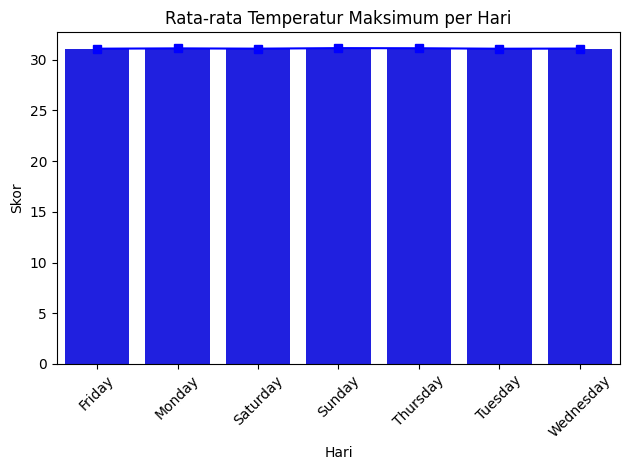

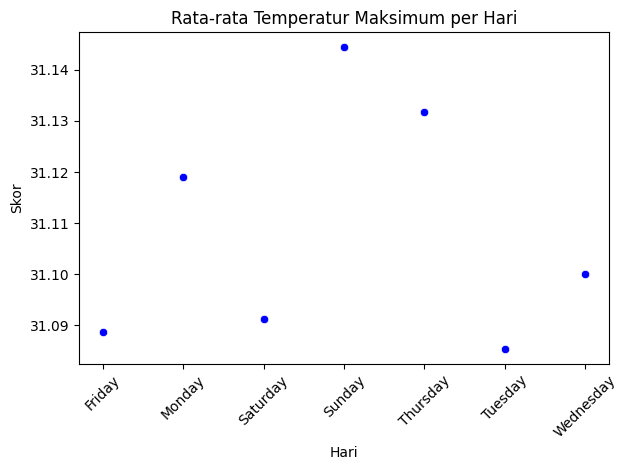

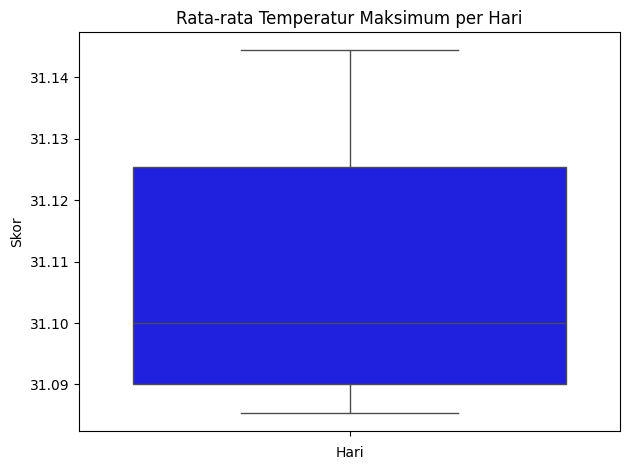

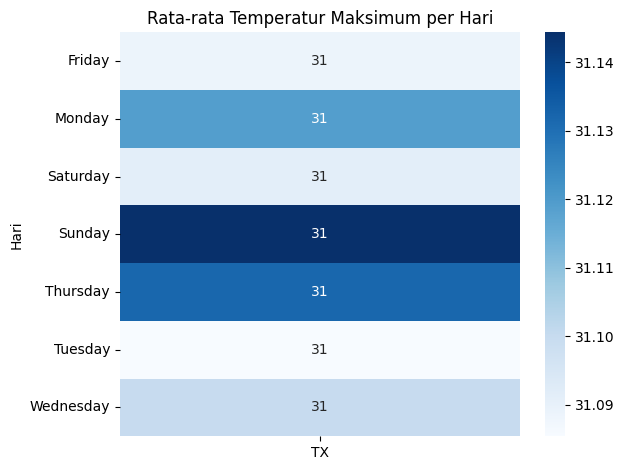

In [68]:

# visualisasi data dengan macam-macam plot 
plt.plot(ispu.groupby('Hari')['TX'].mean(), marker='s', color='blue')
plt.title('Rata-rata Temperatur Maksimum per Hari')
plt.ylabel('Skor')
plt.xlabel('Hari')


sns.barplot(ispu.groupby('Hari')['TX'].mean(), color='blue')
plt.title('Rata-rata Temperatur Maksimum per Hari')
plt.ylabel('Skor')
plt.xlabel('Hari')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

sns.scatterplot(ispu.groupby('Hari')['TX'].mean(), color='blue')
plt.title('Rata-rata Temperatur Maksimum per Hari')
plt.ylabel('Skor')
plt.xlabel('Hari')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

sns.boxplot(ispu.groupby('Hari')['TX'].mean(), color='blue')
plt.title('Rata-rata Temperatur Maksimum per Hari')
plt.ylabel('Skor')
plt.xlabel('Hari')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


avg_tx = ispu.groupby('Hari')['TX'].mean().reset_index()
avg_tx_pivot = avg_tx.pivot_table(index='Hari', values='TX')  # hasilnya 2D
sns.heatmap(avg_tx_pivot, annot=True, cmap='Blues')
plt.title('Rata-rata Temperatur Maksimum per Hari')
plt.ylabel('Hari')
plt.xlabel('')  
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


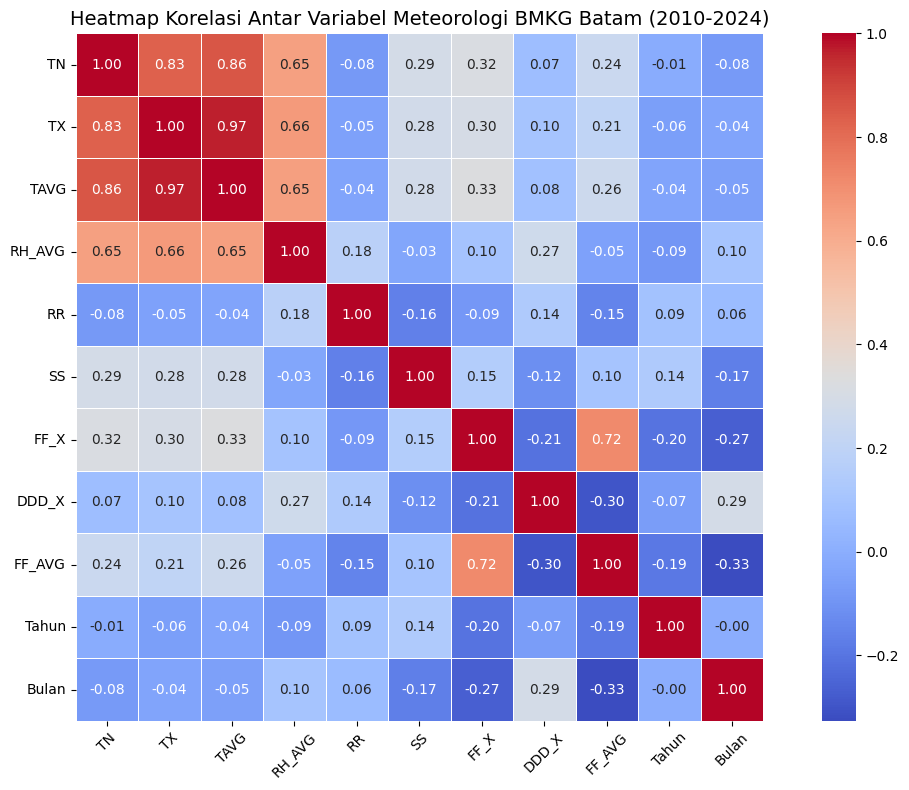

In [69]:
# Hitung korelasi antar kolom numerik
corr_matrix = ispu.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True)

plt.title('Heatmap Korelasi Antar Variabel Meteorologi BMKG Batam (2010-2024)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


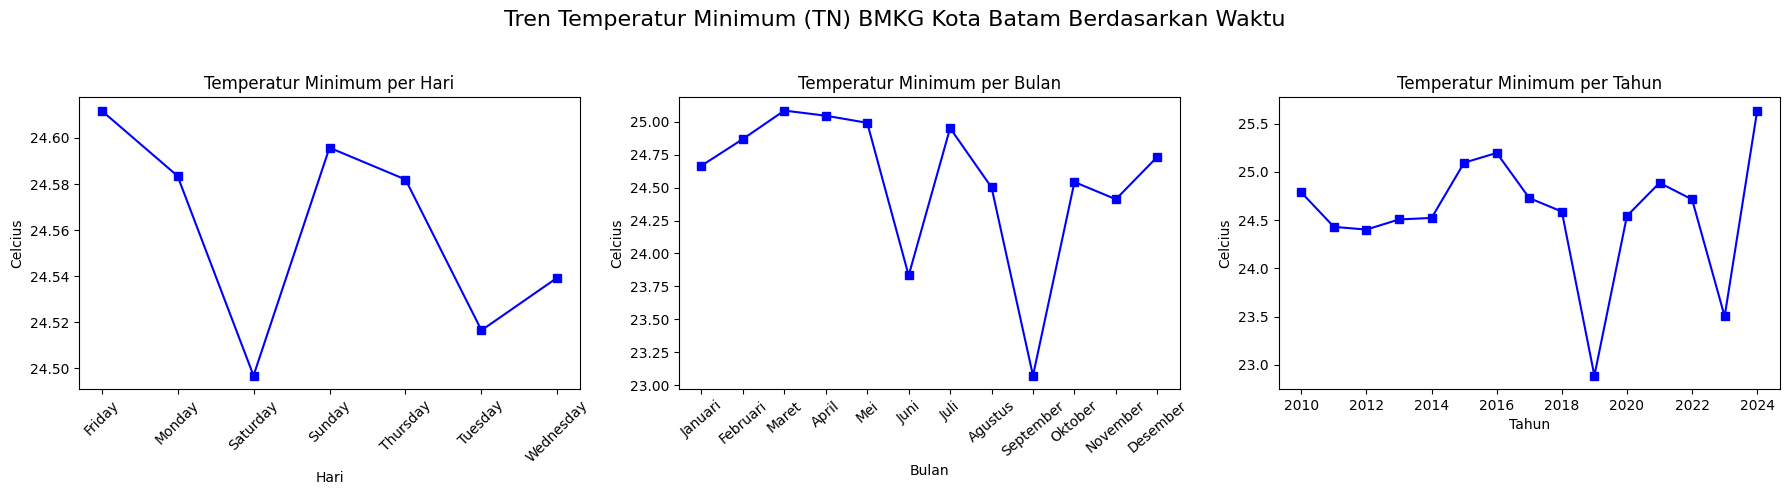

In [70]:
plt.figure(figsize=(18, 5))

# 1. Rata-rata TN per Hari
plt.subplot(1, 3, 1)
plt.plot(ispu.groupby('Hari')['TN'].mean(), marker='s', color='blue')
plt.title('Temperatur Minimum per Hari')
plt.ylabel('Celcius')
plt.xlabel('Hari')
plt.xticks(rotation=45)

# 2. Rata-rata TN per Bulan
bulan_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
tn_per_bulan = ispu.groupby('Bulan')['TN'].mean()
plt.subplot(1, 3, 2)
plt.plot(tn_per_bulan.index, tn_per_bulan.values, marker='s', color='blue')
plt.title('Temperatur Minimum per Bulan')
plt.ylabel('Celcius')
plt.xlabel('Bulan')
plt.xticks(ticks=range(1, 13), labels=bulan_labels, rotation=40)

# 3. Rata-rata TN per Tahun
tn_per_tahun = ispu.groupby('Tahun')['TN'].mean()
plt.subplot(1, 3, 3)
plt.plot(tn_per_tahun.index, tn_per_tahun.values, marker='s', color='blue')
plt.title('Temperatur Minimum per Tahun')
plt.ylabel('Celcius')
plt.xlabel('Tahun')

plt.suptitle('Tren Temperatur Minimum (TN) BMKG Kota Batam Berdasarkan Waktu', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


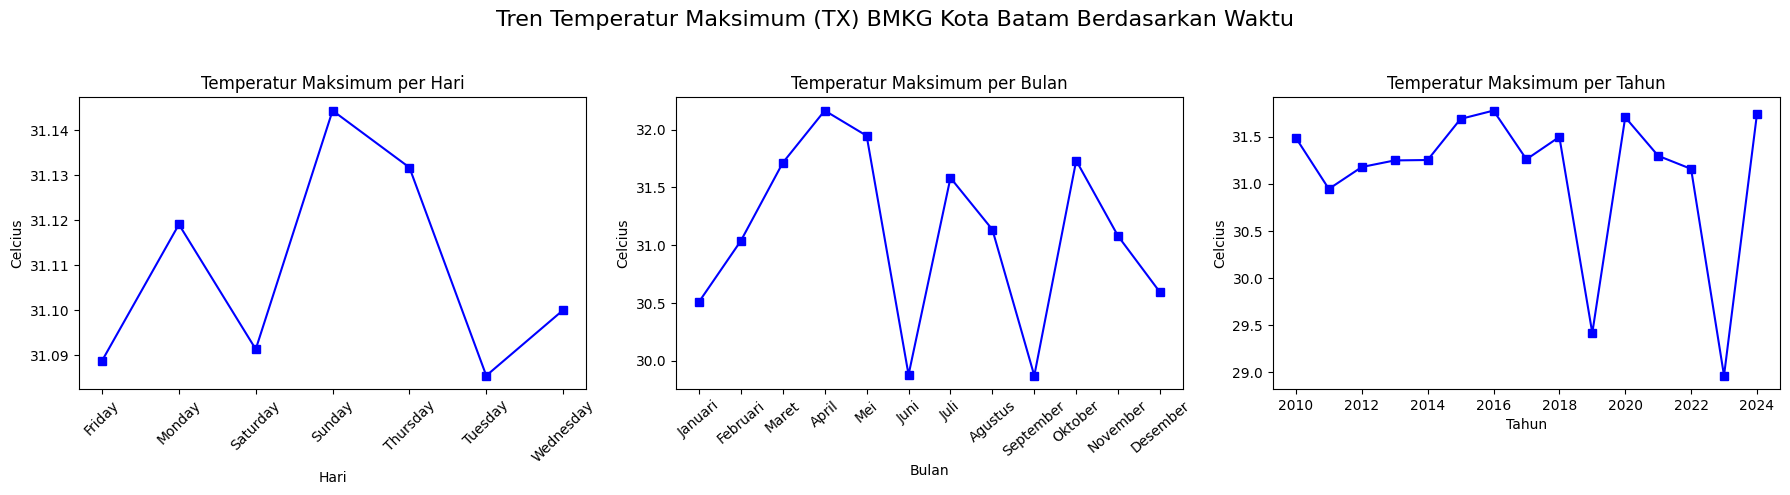

In [71]:
plt.figure(figsize=(18, 5))

# 1. Rata-rata TX per Hari
plt.subplot(1, 3, 1)
plt.plot(ispu.groupby('Hari')['TX'].mean(), marker='s', color='blue')
plt.title('Temperatur Maksimum per Hari')
plt.ylabel('Celcius')
plt.xlabel('Hari')
plt.xticks(rotation=45)

# 2. Rata-rata TX per Bulan
bulan_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
tx_per_bulan = ispu.groupby('Bulan')['TX'].mean()
plt.subplot(1, 3, 2)
plt.plot(tx_per_bulan.index, tx_per_bulan.values, marker='s', color='blue')
plt.title('Temperatur Maksimum per Bulan')
plt.ylabel('Celcius')
plt.xlabel('Bulan')
plt.xticks(ticks=range(1, 13), labels=bulan_labels, rotation=40)

# 3. Rata-rata TX per Tahun
tx_per_tahun = ispu.groupby('Tahun')['TX'].mean()
plt.subplot(1, 3, 3)
plt.plot(tx_per_tahun.index, tx_per_tahun.values, marker='s', color='blue')
plt.title('Temperatur Maksimum per Tahun')
plt.ylabel('Celcius')
plt.xlabel('Tahun')

plt.suptitle('Tren Temperatur Maksimum (TX) BMKG Kota Batam Berdasarkan Waktu', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


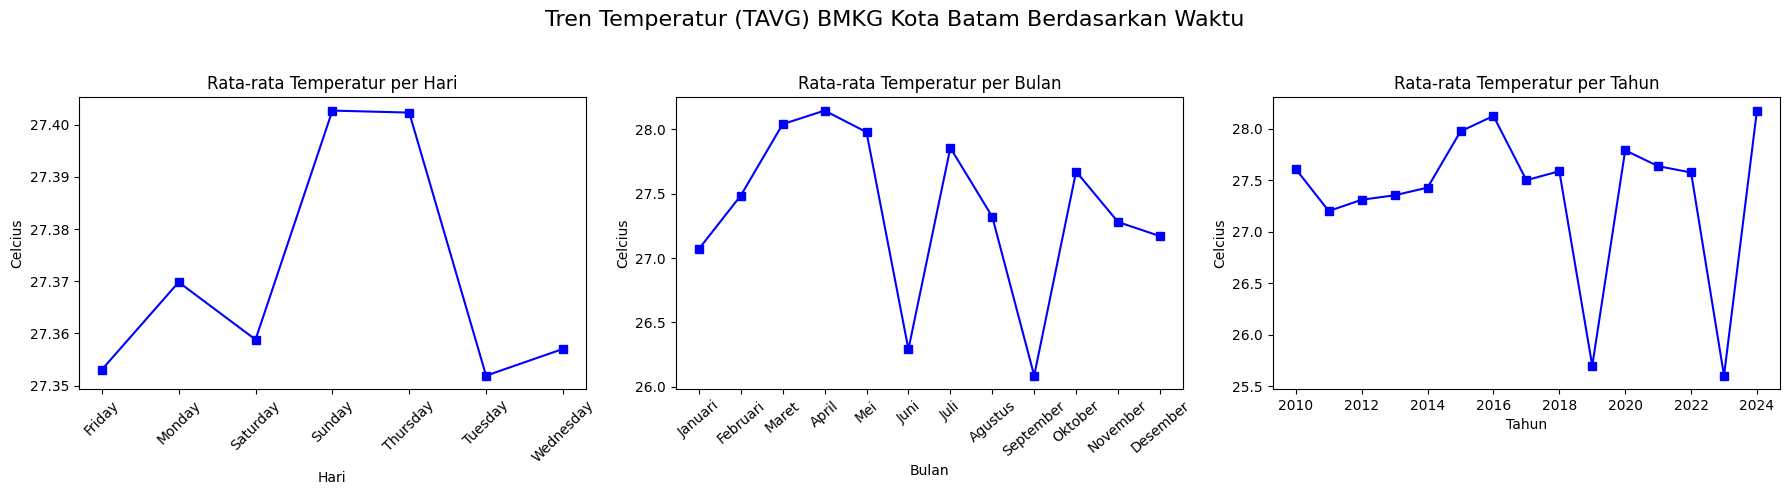

In [72]:
plt.figure(figsize=(18, 5))

# 1. Rata-rata TAVG per Hari
plt.subplot(1, 3, 1)
plt.plot(ispu.groupby('Hari')['TAVG'].mean(), marker='s', color='blue')
plt.title('Rata-rata Temperatur per Hari')
plt.ylabel('Celcius')
plt.xlabel('Hari')
plt.xticks(rotation=45)

# 2. Rata-rata TAVG per Bulan
bulan_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
tavg_per_bulan = ispu.groupby('Bulan')['TAVG'].mean()
plt.subplot(1, 3, 2)
plt.plot(tavg_per_bulan.index, tavg_per_bulan.values, marker='s', color='blue')
plt.title('Rata-rata Temperatur per Bulan')
plt.ylabel('Celcius')
plt.xlabel('Bulan')
plt.xticks(ticks=range(1, 13), labels=bulan_labels, rotation=40)

# 3. Rata-rata TAVG per Tahun
tavg_per_tahun = ispu.groupby('Tahun')['TAVG'].mean()
plt.subplot(1, 3, 3)
plt.plot(tavg_per_tahun.index, tavg_per_tahun.values, marker='s', color='blue')
plt.title('Rata-rata Temperatur per Tahun')
plt.ylabel('Celcius')
plt.xlabel('Tahun')

plt.suptitle('Tren Temperatur (TAVG) BMKG Kota Batam Berdasarkan Waktu', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


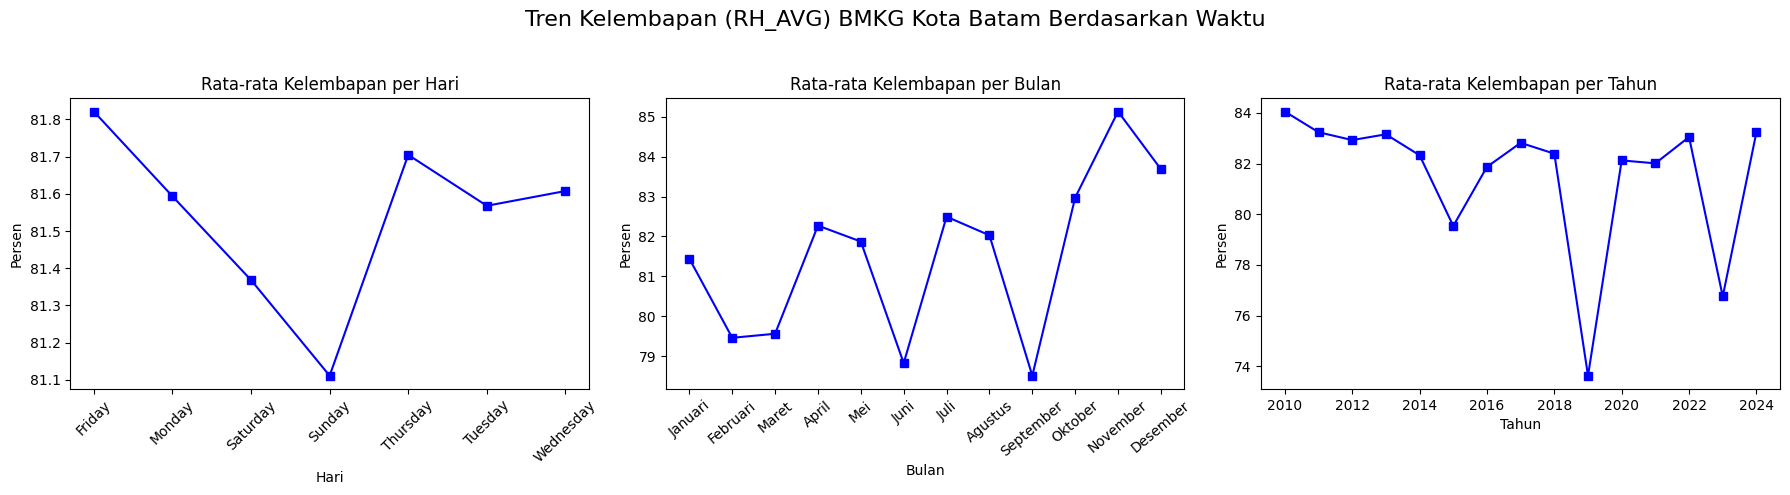

In [73]:
plt.figure(figsize=(18, 5))

# 1. Rata-rata RH_AVG per Hari
plt.subplot(1, 3, 1)
plt.plot(ispu.groupby('Hari')['RH_AVG'].mean(), marker='s', color='blue')
plt.title('Rata-rata Kelembapan per Hari')
plt.ylabel('Persen')
plt.xlabel('Hari')
plt.xticks(rotation=45)

# 2. Rata-rata RH_AVG per Bulan
bulan_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
thavg_per_bulan = ispu.groupby('Bulan')['RH_AVG'].mean()
plt.subplot(1, 3, 2)
plt.plot(thavg_per_bulan.index, thavg_per_bulan.values, marker='s', color='blue')
plt.title('Rata-rata Kelembapan per Bulan')
plt.ylabel('Persen')
plt.xlabel('Bulan')
plt.xticks(ticks=range(1, 13), labels=bulan_labels, rotation=40)

# 3. Rata-rata RH_AVG per Tahun
thavg_per_tahun = ispu.groupby('Tahun')['RH_AVG'].mean()
plt.subplot(1, 3, 3)
plt.plot(thavg_per_tahun.index, thavg_per_tahun.values, marker='s', color='blue')
plt.title('Rata-rata Kelembapan per Tahun')
plt.ylabel('Persen')
plt.xlabel('Tahun')

plt.suptitle('Tren Kelembapan (RH_AVG) BMKG Kota Batam Berdasarkan Waktu', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


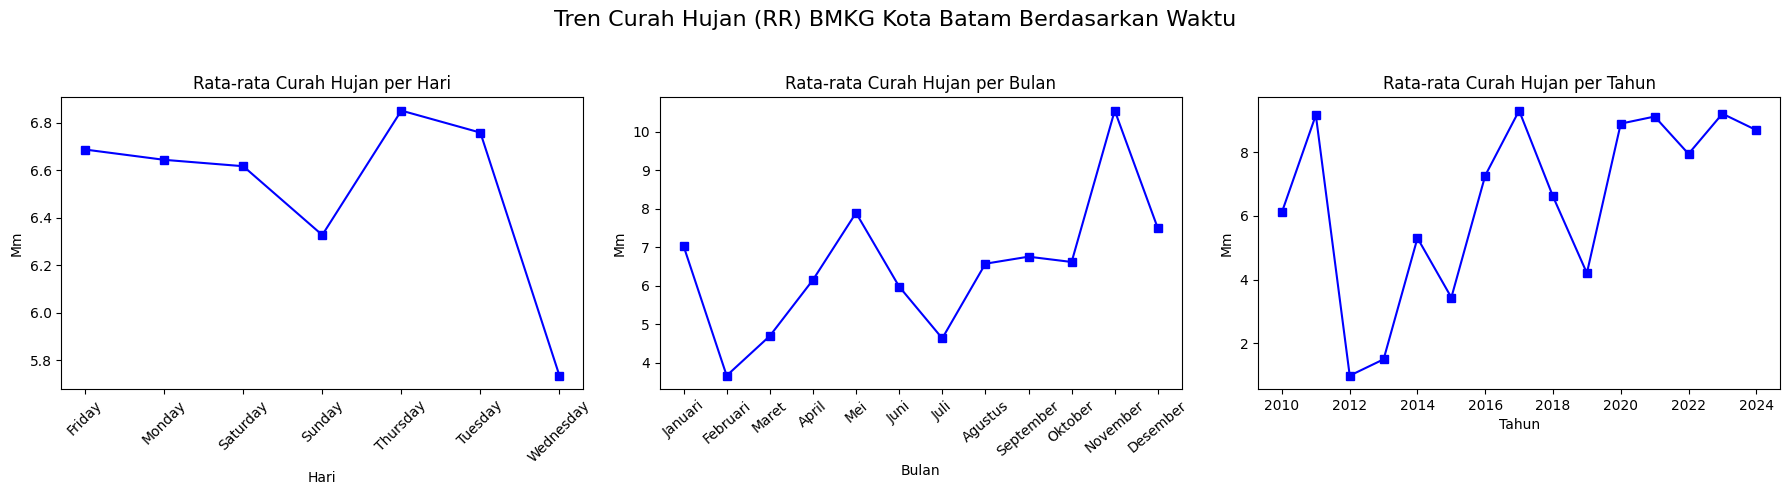

In [74]:
plt.figure(figsize=(18, 5))

# 1. Rata-rata RR per Hari
plt.subplot(1, 3, 1)
plt.plot(ispu.groupby('Hari')['RR'].mean(), marker='s', color='blue')
plt.title('Rata-rata Curah Hujan per Hari')
plt.ylabel('Mm')
plt.xlabel('Hari')
plt.xticks(rotation=45)

# 2. Rata-rata RR per Bulan
bulan_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
rr_per_bulan = ispu.groupby('Bulan')['RR'].mean()
plt.subplot(1, 3, 2)
plt.plot(rr_per_bulan.index, rr_per_bulan.values, marker='s', color='blue')
plt.title('Rata-rata Curah Hujan per Bulan')
plt.ylabel('Mm')
plt.xlabel('Bulan')
plt.xticks(ticks=range(1, 13), labels=bulan_labels, rotation=40)

# 3. Rata-rata RR per Tahun
rr_per_tahun = ispu.groupby('Tahun')['RR'].mean()
plt.subplot(1, 3, 3)
plt.plot(rr_per_tahun.index, rr_per_tahun.values, marker='s', color='blue')
plt.title('Rata-rata Curah Hujan per Tahun')
plt.ylabel('Mm')
plt.xlabel('Tahun')

plt.suptitle('Tren Curah Hujan (RR) BMKG Kota Batam Berdasarkan Waktu', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


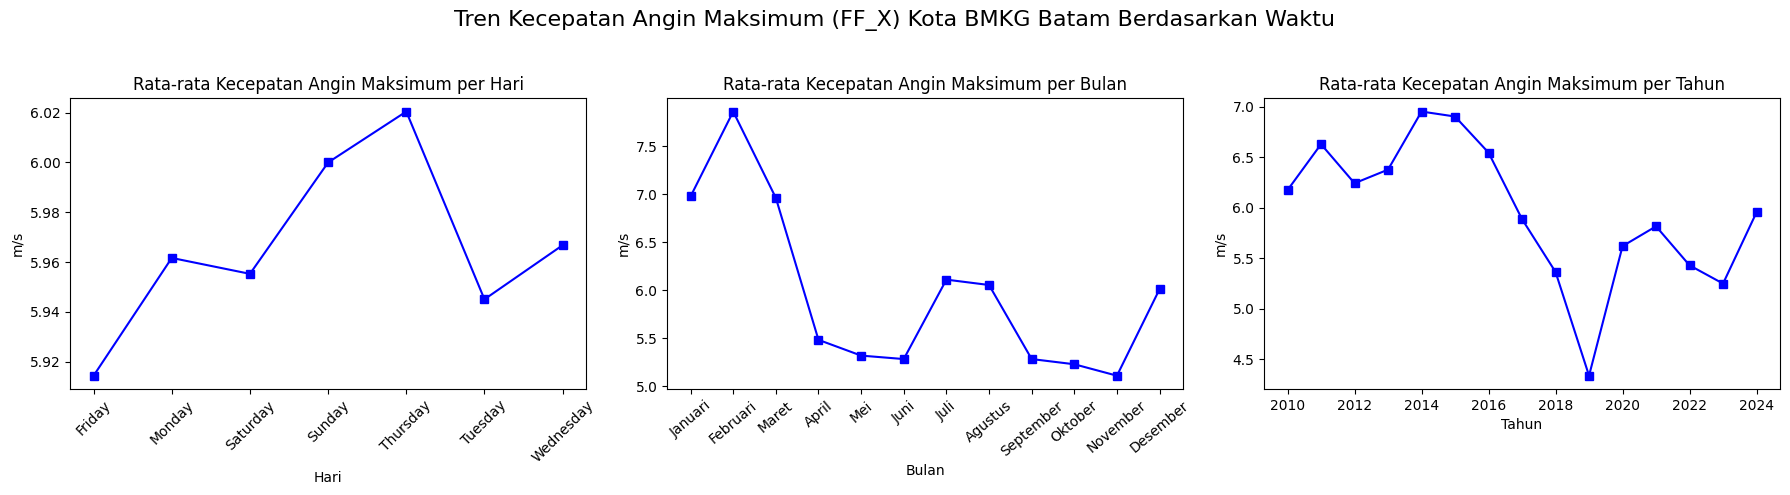

In [75]:
plt.figure(figsize=(18, 5))

# 1. Rata-rata FF_X per Hari
plt.subplot(1, 3, 1)
plt.plot(ispu.groupby('Hari')['FF_X'].mean(), marker='s', color='blue')
plt.title('Rata-rata Kecepatan Angin Maksimum per Hari')
plt.ylabel('m/s')
plt.xlabel('Hari')
plt.xticks(rotation=45)

# 2. Rata-rata FF_X per Bulan
bulan_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
ff_x_per_bulan = ispu.groupby('Bulan')['FF_X'].mean()
plt.subplot(1, 3, 2)
plt.plot(ff_x_per_bulan.index, ff_x_per_bulan.values, marker='s', color='blue')
plt.title('Rata-rata Kecepatan Angin Maksimum per Bulan')
plt.ylabel('m/s')
plt.xlabel('Bulan')
plt.xticks(ticks=range(1, 13), labels=bulan_labels, rotation=40)

# 3. Rata-rata FF_X per Tahun
ff_x_per_tahun = ispu.groupby('Tahun')['FF_X'].mean()
plt.subplot(1, 3, 3)
plt.plot(ff_x_per_tahun.index, ff_x_per_tahun.values, marker='s', color='blue')
plt.title('Rata-rata Kecepatan Angin Maksimum per Tahun')
plt.ylabel('m/s')
plt.xlabel('Tahun')

plt.suptitle('Tren Kecepatan Angin Maksimum (FF_X) Kota BMKG Batam Berdasarkan Waktu', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


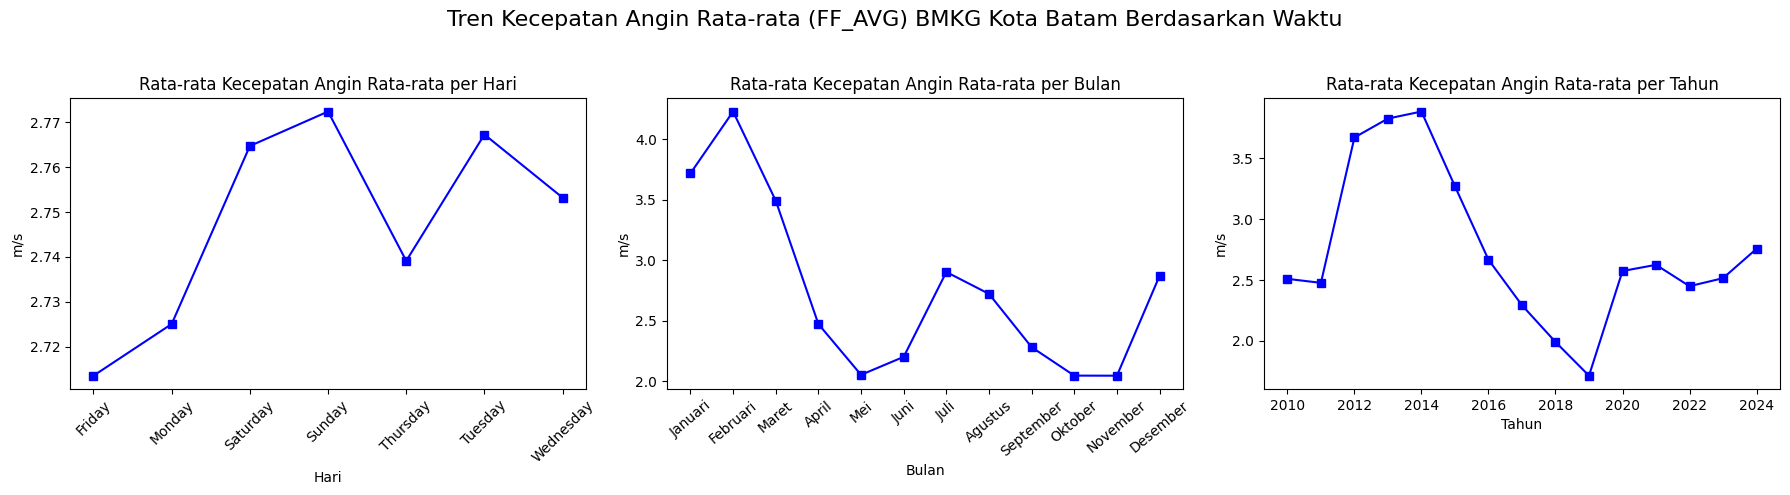

In [76]:
plt.figure(figsize=(18, 5))

# 1. Rata-rata FF_AVG per Hari
plt.subplot(1, 3, 1)
plt.plot(ispu.groupby('Hari')['FF_AVG'].mean(), marker='s', color='blue')
plt.title('Rata-rata Kecepatan Angin Rata-rata per Hari')
plt.ylabel('m/s')
plt.xlabel('Hari')
plt.xticks(rotation=45)

# 2. Rata-rata FF_AVG per Bulan
bulan_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
ff_avg_per_bulan = ispu.groupby('Bulan')['FF_AVG'].mean()
plt.subplot(1, 3, 2)
plt.plot(ff_avg_per_bulan.index, ff_avg_per_bulan.values, marker='s', color='blue')
plt.title('Rata-rata Kecepatan Angin Rata-rata per Bulan')
plt.ylabel('m/s')
plt.xlabel('Bulan')
plt.xticks(ticks=range(1, 13), labels=bulan_labels, rotation=40)

# 3. Rata-rata FF_AVG per Tahun
ff_avg_per_tahun = ispu.groupby('Tahun')['FF_AVG'].mean()
plt.subplot(1, 3, 3)
plt.plot(ff_avg_per_tahun.index, ff_avg_per_tahun.values, marker='s', color='blue')
plt.title('Rata-rata Kecepatan Angin Rata-rata per Tahun')
plt.ylabel('m/s')
plt.xlabel('Tahun')

plt.suptitle('Tren Kecepatan Angin Rata-rata (FF_AVG) BMKG Kota Batam Berdasarkan Waktu', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


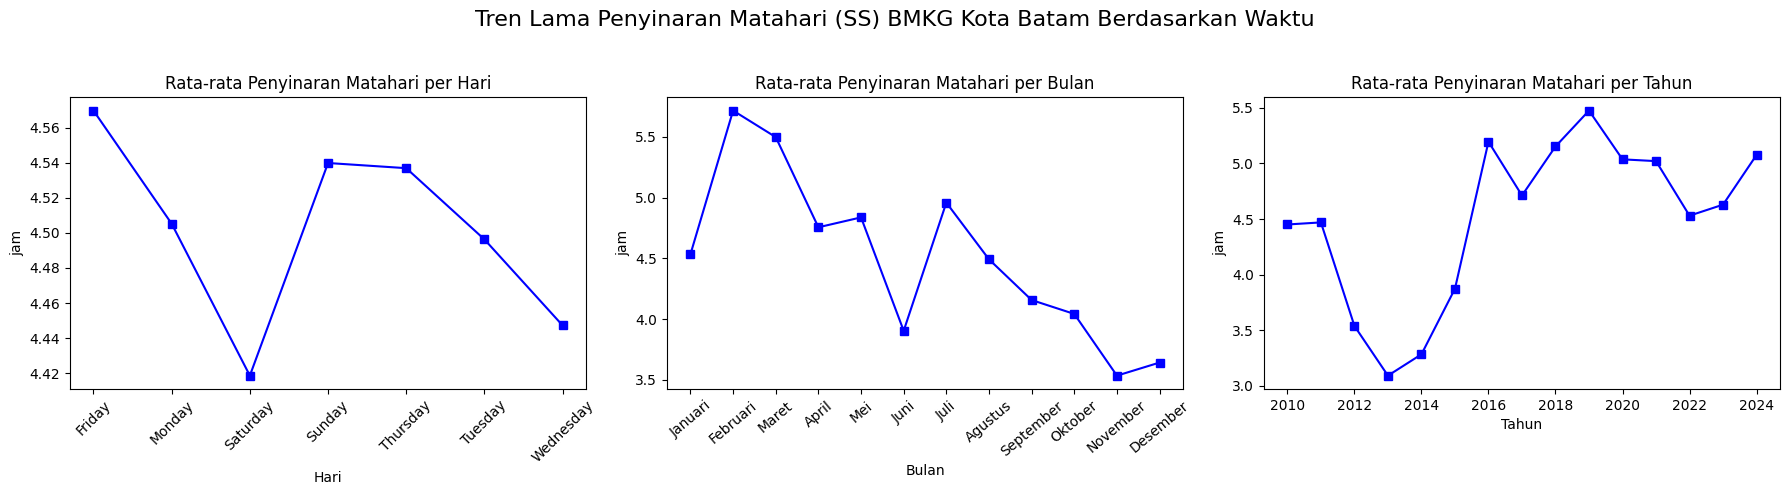

In [77]:
plt.figure(figsize=(18, 5))

# 1. Rata-rata SS per Hari
plt.subplot(1, 3, 1)
plt.plot(ispu.groupby('Hari')['SS'].mean(), marker='s', color='blue')
plt.title('Rata-rata Penyinaran Matahari per Hari')
plt.ylabel('jam')
plt.xlabel('Hari')
plt.xticks(rotation=45)

# 2. Rata-rata SS per Bulan
bulan_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
ss_per_bulan = ispu.groupby('Bulan')['SS'].mean()
plt.subplot(1, 3, 2)
plt.plot(ss_per_bulan.index, ss_per_bulan.values, marker='s', color='blue')
plt.title('Rata-rata Penyinaran Matahari per Bulan')
plt.ylabel('jam')
plt.xlabel('Bulan')
plt.xticks(ticks=range(1, 13), labels=bulan_labels, rotation=40)

# 3. Rata-rata SS per Tahun
ss_per_tahun = ispu.groupby('Tahun')['SS'].mean()
plt.subplot(1, 3, 3)
plt.plot(ss_per_tahun.index, ss_per_tahun.values, marker='s', color='blue')
plt.title('Rata-rata Penyinaran Matahari per Tahun')
plt.ylabel('jam')
plt.xlabel('Tahun')

plt.suptitle('Tren Lama Penyinaran Matahari (SS) BMKG Kota Batam Berdasarkan Waktu', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


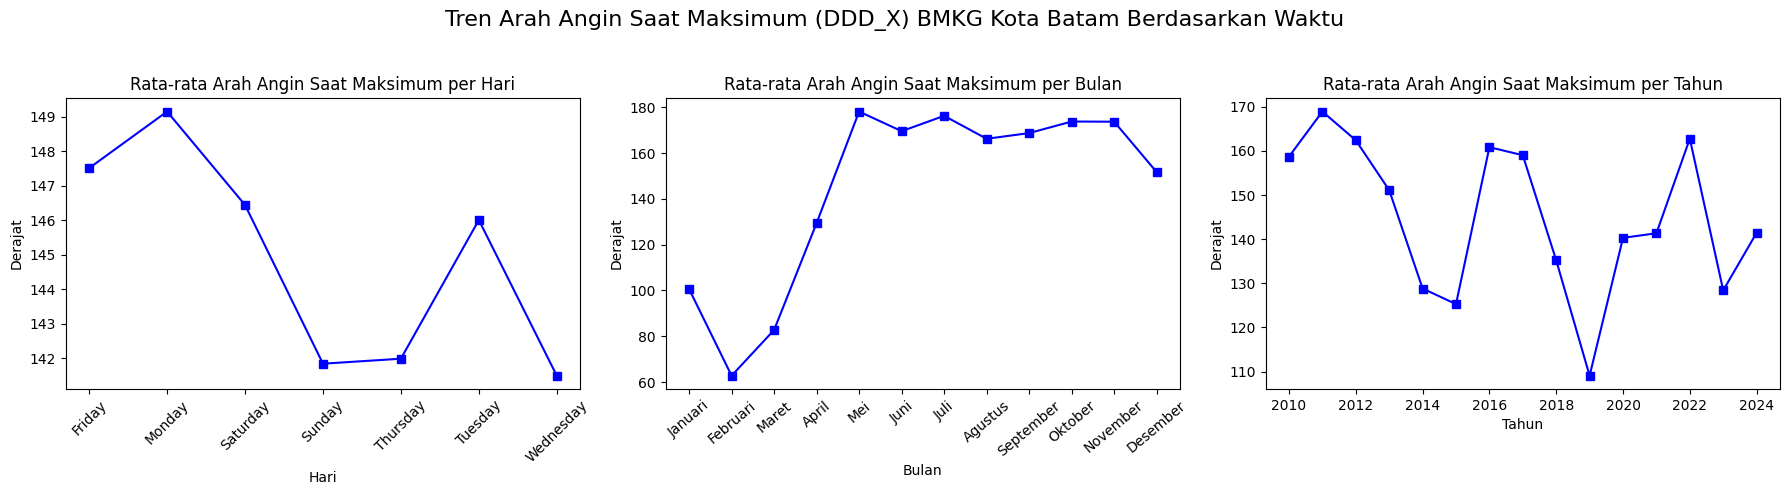

In [78]:
plt.figure(figsize=(18, 5))

# 1. Rata-rata DDD_X per Hari
plt.subplot(1, 3, 1)
plt.plot(ispu.groupby('Hari')['DDD_X'].mean(), marker='s', color='blue')
plt.title('Rata-rata Arah Angin Saat Maksimum per Hari')
plt.ylabel('Derajat')
plt.xlabel('Hari')
plt.xticks(rotation=45)

# 2. Rata-rata DDD_X per Bulan
bulan_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
dddx_per_bulan = ispu.groupby('Bulan')['DDD_X'].mean()
plt.subplot(1, 3, 2)
plt.plot(dddx_per_bulan.index, dddx_per_bulan.values, marker='s', color='blue')
plt.title('Rata-rata Arah Angin Saat Maksimum per Bulan')
plt.ylabel('Derajat')
plt.xlabel('Bulan')
plt.xticks(ticks=range(1, 13), labels=bulan_labels, rotation=40)

# 3. Rata-rata DDD_X per Tahun
dddx_per_tahun = ispu.groupby('Tahun')['DDD_X'].mean()
plt.subplot(1, 3, 3)
plt.plot(dddx_per_tahun.index, dddx_per_tahun.values, marker='s', color='blue')
plt.title('Rata-rata Arah Angin Saat Maksimum per Tahun')
plt.ylabel('Derajat')
plt.xlabel('Tahun')

plt.suptitle('Tren Arah Angin Saat Maksimum (DDD_X) BMKG Kota Batam Berdasarkan Waktu', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
